In [135]:
import numpy as np
import pandas as pd

In [136]:
df = pd.read_csv('spam.csv')

In [137]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3764,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
3954,ham,I knew it... U slept v late yest? Wake up so l...,NaN,NaN,NaN
4825,ham,"Haha, just what I was thinkin",NaN,NaN,NaN
1292,ham,Da my birthdate in certificate is in april but...,NaN,NaN,NaN
23,ham,Aft i finish my lunch then i go str down lor. ...,NaN,NaN,NaN
2132,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,NaN,NaN,NaN
2306,ham,"Aight that'll work, thanks",NaN,NaN,NaN
2126,ham,You do got a shitload of diamonds though,NaN,NaN,NaN
4172,ham,Ok... But they said i've got wisdom teeth hidd...,NaN,NaN,NaN
3790,spam,"Twinks, bears, scallies, skins and jocks are c...",NaN,NaN,NaN


In [138]:
df.shape

(5572, 5)

In [139]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation

## 1. Data cleaning 

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [141]:
# drop 3 last columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [142]:
df.sample(5)

,v1,v2
4990,ham,We made it! Eta at taunton is 12:30 as planned...
3865,ham,"Theoretically yeah, he could be able to come"
3309,ham,Oh ho. Is this the first time u use these type...
1235,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
2002,spam,TheMob>Yo yo yo-Here comes a new selection of ...


In [143]:
# rename columns 
df.rename(columns = {'v1':'target','v2':'text'}, inplace = True)

In [144]:
df.sample(5)

,target,text
3999,spam,This is the 2nd time we have tried to contact ...
1082,ham,Send to someone else :-)
4444,ham,"2 celebrate my båÕday, y else?"
1280,ham,Oh ho. Is this the first time u use these type...
5290,ham,Dear where you. Call me


In [145]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [146]:
df['target'] = encoder.fit_transform(df['target']) # Chuyển dữ liệu cột target thành các giá trị số ham = 0, spam = 1

In [147]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
# giá trị bị thiếu (missing value)
df.isnull().sum()

target    0
text      0
dtype: int64

In [149]:
# check duplicate value
df.duplicated().sum()

403

In [150]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [151]:
df.sample(10)

,target,text
2357,0,Okay same with me. Well thanks for the clarifi...
4209,0,No da:)he is stupid da..always sending like th...
652,0,"Wait, do you know if wesleys in town? I bet sh..."
4975,0,You are gorgeous! keep those pix cumming :) th...
4751,0,Well boy am I glad G wasted all night at apple...
1021,1,Guess what! Somebody you know secretly fancies...
3791,0,Love it! I want to flood that pretty pussy wit...
858,0,Spoons it is then okay?
2522,0,Dunno lei... I might b eatin wif my frens... I...
882,0,I love to give massages. I use lots of baby oi...


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


## 2. EDA


In [153]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [154]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

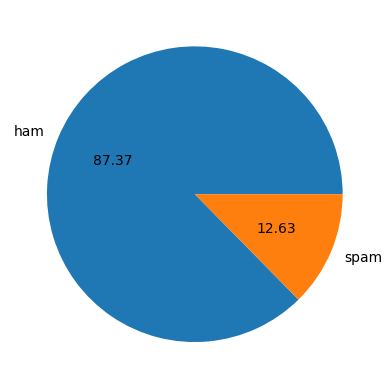

In [155]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [156]:
# Data is imbalanced

In [157]:
import nltk

In [158]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [159]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [160]:
# num of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x))) # count number of words 
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [161]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x))) # count number of words 
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [162]:
df[['num_characters','num_words','num_sentences']].describe()  # mô tả thống kê

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [163]:
# biểu diễn thông số cơ bản của ham message
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [164]:
# biểu diễn thông số cơ bản của spam message
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [165]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

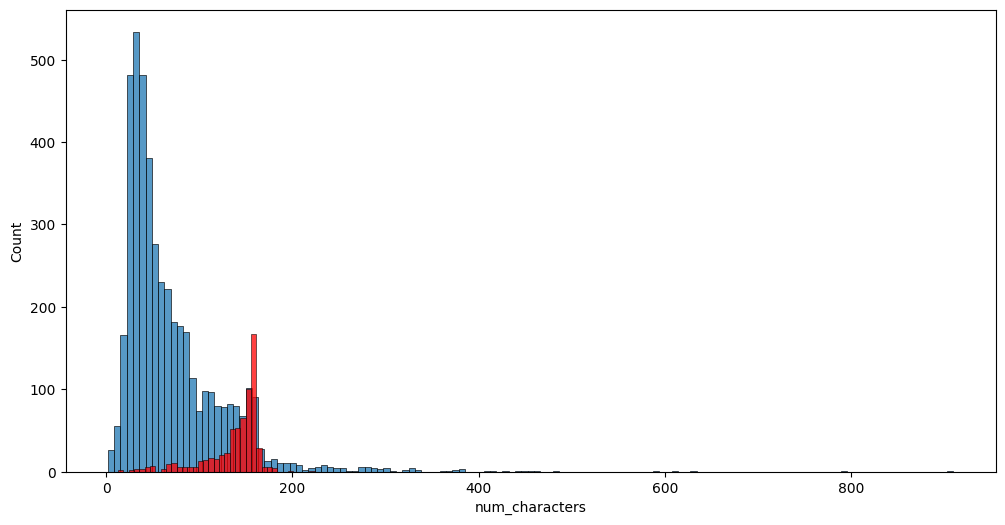

In [166]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

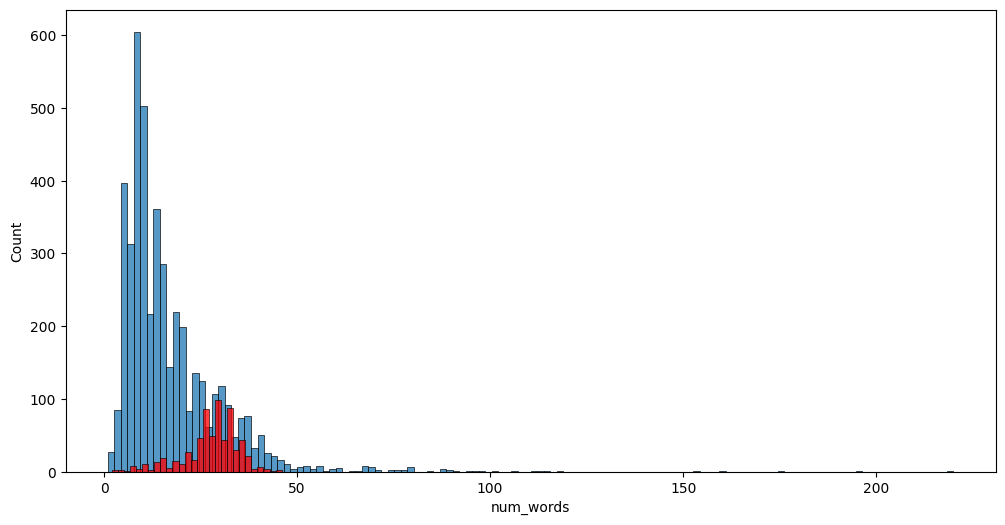

In [167]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

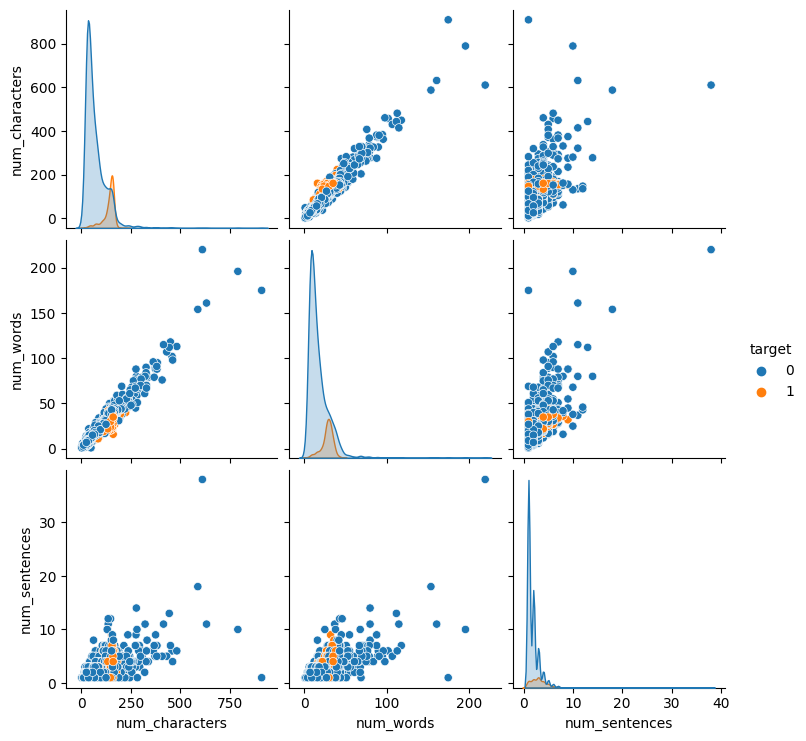

In [168]:
sns.pairplot(df, hue = 'target')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5988\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot: >

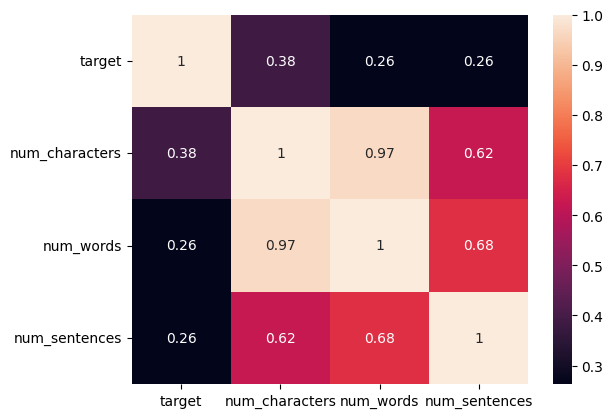

In [169]:
sns.heatmap(df.corr(), annot = True)

# 3. Data preprocessing
## 3.1. Lower case
## 3.2. Tokenization
## 3.3. Removing special characters
## 3.4. Removing stop words and punctuation
## 3.5. Stemming

In [170]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [171]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [172]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [173]:
def transform_text(text): 
    text = text.lower()     
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:] # copy y to text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [174]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [175]:
df['transformed_text'] = df['text'].apply(transform_text)

In [176]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [177]:

from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [178]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

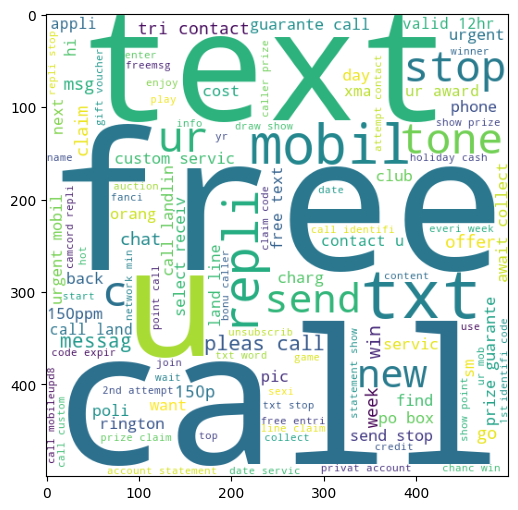

In [179]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [180]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

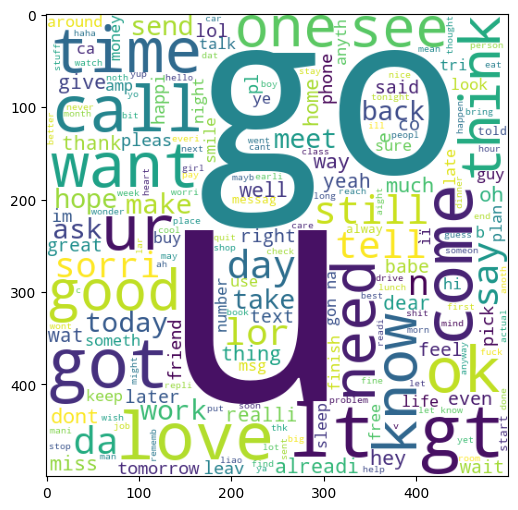

In [181]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [182]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [183]:
len(spam_corpus)

9939

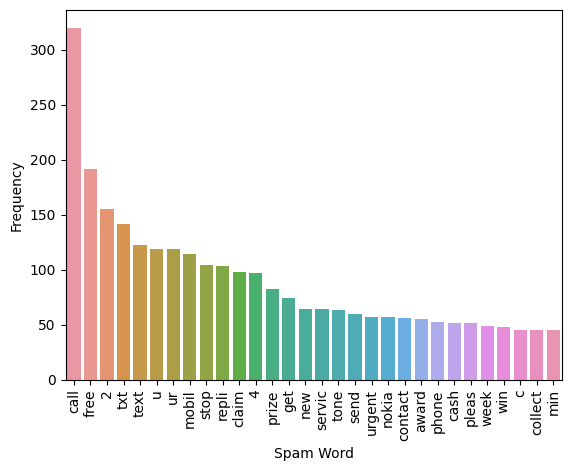

In [184]:
from collections import Counter
word_freq = Counter(spam_corpus).most_common(30)
df_word_freq = pd.DataFrame(word_freq, columns=['Spam Word', 'Frequency'])
sns.barplot(x='Spam Word', y='Frequency', data=df_word_freq)
plt.xticks(rotation = 'vertical')
plt.show()

In [185]:
spam_words_dict = {}  # Khởi tạo từ điển để lưu trữ tần suất xuất hiện của spam words

# Duyệt qua từng từ trong danh sách và tăng tần suất xuất hiện trong từ điển
for word in spam_corpus:
    if word in spam_words_dict:
        spam_words_dict[word] += 1
    else:
        spam_words_dict[word] = 1

spam_words_dict = sorted(spam_words_dict.items(), key=lambda x: x[1], reverse=True)

# In tần suất xuất hiện của từng từ
for word, freq in spam_words_dict:
    print(f"Từ '{word}' xuất hiện {freq} lần")
spam_words_dict = dict(spam_words_dict)



Từ 'call' xuất hiện 320 lần
Từ 'free' xuất hiện 191 lần
Từ '2' xuất hiện 155 lần
Từ 'txt' xuất hiện 141 lần
Từ 'text' xuất hiện 122 lần
Từ 'u' xuất hiện 119 lần
Từ 'ur' xuất hiện 119 lần
Từ 'mobil' xuất hiện 114 lần
Từ 'stop' xuất hiện 104 lần
Từ 'repli' xuất hiện 103 lần
Từ 'claim' xuất hiện 98 lần
Từ '4' xuất hiện 97 lần
Từ 'prize' xuất hiện 82 lần
Từ 'get' xuất hiện 74 lần
Từ 'new' xuất hiện 64 lần
Từ 'servic' xuất hiện 64 lần
Từ 'tone' xuất hiện 63 lần
Từ 'send' xuất hiện 60 lần
Từ 'urgent' xuất hiện 57 lần
Từ 'nokia' xuất hiện 57 lần
Từ 'contact' xuất hiện 56 lần
Từ 'award' xuất hiện 55 lần
Từ 'phone' xuất hiện 52 lần
Từ 'cash' xuất hiện 51 lần
Từ 'pleas' xuất hiện 51 lần
Từ 'week' xuất hiện 49 lần
Từ 'win' xuất hiện 48 lần
Từ 'c' xuất hiện 45 lần
Từ 'collect' xuất hiện 45 lần
Từ 'min' xuất hiện 45 lần
Từ 'custom' xuất hiện 42 lần
Từ 'messag' xuất hiện 42 lần
Từ 'guarante' xuất hiện 42 lần
Từ 'per' xuất hiện 41 lần
Từ 'chat' xuất hiện 38 lần
Từ 'tri' xuất hiện 37 lần
Từ 'msg' xuất

In [186]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [187]:
len(ham_corpus)

35404

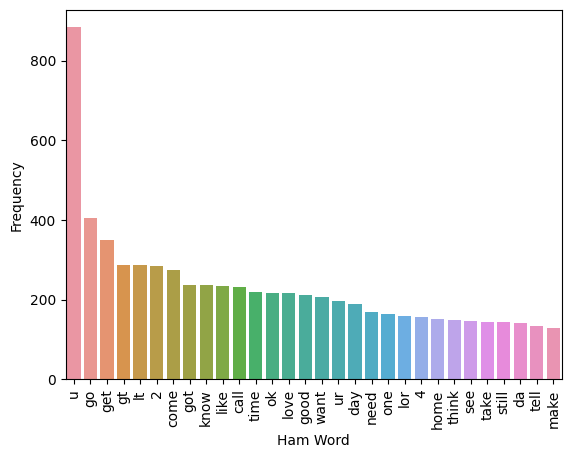

In [188]:
from collections import Counter
word_freq = Counter(ham_corpus).most_common(30)
df_word_freq = pd.DataFrame(word_freq, columns=['Ham Word', 'Frequency'])
sns.barplot(x='Ham Word', y='Frequency', data=df_word_freq)
plt.xticks(rotation = 'vertical')
plt.show()

In [189]:
ham_words_dict = {}  # Khởi tạo từ điển để lưu trữ tần suất xuất hiện của ham words

# Duyệt qua từng từ trong danh sách và tăng tần suất xuất hiện trong từ điển
for word in ham_corpus:
    if word in ham_words_dict:
        ham_words_dict[word] += 1
    else:
        ham_words_dict[word] = 1

ham_words_dict = sorted(ham_words_dict.items(), key=lambda x: x[1], reverse=True)

# In tần suất xuất hiện của từng từ
for word, freq in ham_words_dict:
    print(f"Từ '{word}' xuất hiện {freq} lần")
ham_words_dict = dict(ham_words_dict)


Từ 'u' xuất hiện 883 lần
Từ 'go' xuất hiện 404 lần
Từ 'get' xuất hiện 349 lần
Từ 'gt' xuất hiện 288 lần
Từ 'lt' xuất hiện 287 lần
Từ '2' xuất hiện 284 lần
Từ 'come' xuất hiện 275 lần
Từ 'got' xuất hiện 236 lần
Từ 'know' xuất hiện 236 lần
Từ 'like' xuất hiện 234 lần
Từ 'call' xuất hiện 233 lần
Từ 'time' xuất hiện 219 lần
Từ 'ok' xuất hiện 217 lần
Từ 'love' xuất hiện 216 lần
Từ 'good' xuất hiện 213 lần
Từ 'want' xuất hiện 208 lần
Từ 'ur' xuất hiện 197 lần
Từ 'day' xuất hiện 190 lần
Từ 'need' xuất hiện 170 lần
Từ 'one' xuất hiện 165 lần
Từ 'lor' xuất hiện 159 lần
Từ '4' xuất hiện 156 lần
Từ 'home' xuất hiện 152 lần
Từ 'think' xuất hiện 149 lần
Từ 'see' xuất hiện 147 lần
Từ 'take' xuất hiện 143 lần
Từ 'still' xuất hiện 143 lần
Từ 'da' xuất hiện 142 lần
Từ 'tell' xuất hiện 133 lần
Từ 'make' xuất hiện 129 lần
Từ 'say' xuất hiện 127 lần
Từ 'back' xuất hiện 127 lần
Từ 'today' xuất hiện 123 lần
Từ 'hope' xuất hiện 122 lần
Từ 'ask' xuất hiện 121 lần
Từ 'sorri' xuất hiện 121 lần
Từ 'n' xuất hiện 

In [190]:
def split_sentence(text):
    word_list = nltk.word_tokenize(transform_text(text))
    return word_list

In [191]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [192]:
a = df['target'].value_counts()[0]

In [193]:
b = df['target'].value_counts()[1]

In [194]:
P_Spam = b/(a+b)
P_Ham = a/(a+b)
T = len(ham_words_dict.keys()) + len(spam_words_dict.keys())

In [195]:
def frequency_dict(list_input, words_dict):
    result_dict = {}
    total_frequency = 0
    
    for word in list_input:
        total_frequency = total_frequency + words_dict.get(word, 0)
    
    for word in list_input:
        frequency = words_dict.get(word, 0)
        result_dict[word] = (frequency + 1) / (total_frequency + T)
    
    return result_dict

In [220]:
def spam_detection(text):
    
    list_input = split_sentence(text)
    freq_ham = frequency_dict(list_input, ham_words_dict)
    freq_spam = frequency_dict(list_input, spam_words_dict)
    
    P_input_spam = 1
    for word in freq_spam:
        P_input_spam = P_input_spam * freq_spam[word]
        
    P_input_ham = 1
    for word in freq_ham:
        P_input_ham = P_input_ham * freq_ham[word]
        
    c_spam = P_input_spam * P_Spam
    print(c_spam)
    c_ham = P_input_ham * P_Ham
    print(c_ham)
    if (c_spam > c_ham):
        print("SPAM")
    else:
        print("HAM")

In [212]:
spam_detection("Congratulation! You've just won a lottery prize for 30000$. Please contact us via 12345")

SPAM


In [213]:
spam_detection("Are u at home right now? I'm heading to your house?")

HAM


In [222]:
spam_detection("Do you want to be a millionare? Click here to join us and have a chance to claim 10000000$ prize")

5.9818776585939846e-27
5.220490797728317e-29
SPAM


In [219]:
print(split_sentence("Do you want to be a millionare? Click here to join us and have a chance to take 10000000$ prize"))

['want', 'millionar', 'click', 'join', 'us', 'chanc', 'take', '10000000', 'prize']
